# IE4211 Project (Linear and polynomial regression)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [39]:
train_data=pd.read_csv('Data-Train.csv', index_col=0)
test_data=pd.read_csv('Data-Test.csv', index_col=0)

test_data.head()

productID  brandID  attribute1  attribute2  attribute3  attribute4  \
0         77       38         3.0       100.0           2    5.670374   
1         47       30         4.0       100.0           9    5.191429   
2         33       25         3.0       100.0           1    2.461109   
3         68       28         3.0       100.0           2    4.659192   
4         65       16         3.0        90.0           2   15.554293   

   clickVolume  avgOriginalUnitPrice  avgFinalUnitPrice  ma14SalesVolume  \
0        173.0            180.835683         165.459988        12.857143   
1        142.0            190.802856         138.995392         2.285714   
2        144.0            127.385574         123.286542         4.500000   
3        220.0            240.873276         168.258175        17.500000   
4       4079.0             85.013188          68.521885       115.785714   

   weekday    meanAge    gender  meanEducation  maritalStatus      plus  \
0        4  26.960521  0.053158       2.958528       0.668194  0.148227   
1        5  33.111475  0.317086       3.292282       0.709143  0.272464   
2        6  30.353550  0.000000       2.668048       1.002511  0.000000   
3        6  29.692379  0.000000       2.470400       0.424764  0.000000   
4        7  33.128355  0.201974       2.432218       0.592206  0.005535   

   meanPurchasePower  meanUserLevel  meanCityLevel  
0           2.347953       2.638135       1.997034  
1           2.409795       3.973464       1.385002  
2           1.955541       2.937542       2.369596  
3           1.932938       2.480643       2.505191  
4           2.428117       1.792081       2.669685

In [40]:
catvar = ['productID', 'brandID', 'attribute1', 'attribute2', 'attribute3', 'weekday'] 

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

transformed_columns = encoder.fit_transform(train_data[catvar])

encoded_dataset = pd.DataFrame(transformed_columns, columns=encoder.get_feature_names_out(catvar))

train_data = train_data.drop(columns=catvar)

train_data = pd.concat([train_data, encoded_dataset], axis=1)

C:\Users\65924\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
train_data

attribute4  clickVolume  avgOriginalUnitPrice  avgFinalUnitPrice  \
0       1.561599        799.0            237.206500         186.956968   
1       7.747685        352.0            178.540538         129.123143   
2       3.899665        293.0            119.066221          59.136199   
3       1.585429        537.0            139.452545          68.572100   
4       4.623051       6668.0            298.106532         244.047761   
...          ...          ...                   ...                ...   
1571    1.610909       1558.0             89.371417          41.336335   
1572   13.657958         74.0             80.494579          59.261375   
1573    5.449706        353.0             76.912038          48.459064   
1574    9.496754       1740.0             69.920092          50.999694   
1575   18.313448        703.0            189.276037          84.889386   

      ma14SalesVolume    meanAge    gender  meanEducation  maritalStatus  \
0           11.785714  35.498327  0.114401       3.046749       0.562923   
1           25.785714  25.633478  0.000000       3.005766       0.000000   
2           21.357143  32.228120  0.158911       2.935705       0.293093   
3            7.285714  29.304317  0.186522       2.810752       0.242181   
4          296.214286  29.132081  0.300183       3.032527       0.391279   
...               ...        ...       ...            ...            ...   
1571        34.142857  38.176047  0.434893       2.805286       0.652032   
1572         5.214286  20.134348  0.019198       2.969021       0.052638   
1573         5.000000  35.180962  0.260036       2.425446       0.701358   
1574        59.857143  31.277144  0.639961       3.125656       0.678429   
1575        10.500000  34.766484  0.000000       3.344549       0.824813   

          plus  ...  attribute3_24  attribute3_25  attribute3_28  weekday_1  \
0     0.206291  ...            0.0            0.0            0.0        0.0   
1     0.444095  ...            0.0            0.0            0.0        0.0   
2     0.132959  ...            0.0            0.0            0.0        0.0   
3     0.000000  ...            0.0            0.0            0.0        0.0   
4     0.103062  ...            0.0            0.0            0.0        0.0   
...        ...  ...            ...            ...            ...        ...   
1571  0.678596  ...            0.0            0.0            0.0        0.0   
1572  0.065188  ...            0.0            0.0            0.0        0.0   
1573  0.190540  ...            0.0            0.0            0.0        1.0   
1574  0.319564  ...            0.0            0.0            0.0        0.0   
1575  0.571859  ...            0.0            0.0            0.0        0.0   

      weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weekday_7  
0           0.0        0.0        1.0        0.0        0.0        0.0  
1           0.0        0.0        0.0        0.0        0.0        1.0  
2           0.0        0.0        0.0        0.0        1.0        0.0  
3           0.0        0.0        0.0        1.0        0.0        0.0  
4           0.0        0.0        0.0        1.0        0.0        0.0  
...         ...        ...        ...        ...        ...        ...  
1571        0.0        0.0        0.0        0.0        1.0        0.0  
1572        0.0        0.0        1.0        0.0        0.0        0.0  
1573        0.0        0.0        0.0        0.0        0.0        0.0  
1574        0.0        0.0        0.0        0.0        1.0        0.0  
1575        1.0        0.0        0.0        0.0        0.0        0.0  

[1576 rows x 153 columns]

In [52]:
logsales = np.log(train_data.sales)
train_data['logsales'] = logsales

# 1. Linear regression

In [57]:
# Create the formula string for the OLS model
formula = f'sales ~ {independent_variables}'

# Fit the linear regression model using the correct formula and the data
model = smf.ols(formula=formula, data=train_data).fit()

# View the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     77.63
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:36:11   Log-Likelihood:                -7702.5
No. Observations:                1576   AIC:                         1.561e+04
Df Residuals:                    1473   BIC:                         1.616e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.7373 

In [59]:
independent_variables_data = train_data[train_data.columns.difference(['logsales', 'sales'])]
train_predictions = model.predict(independent_variables_data)

# Calculate the residuals
residuals = train_data['sales'] - train_predictions

# Calculate the mean squared error
mse = (residuals ** 2).mean()

print(f"Train MSE for sales: {mse}")

Train MSE for sales: 1029.566152140454


# 2. Polynomial regression

In [44]:
train_data

attribute4  clickVolume  avgOriginalUnitPrice  avgFinalUnitPrice  \
0       1.561599        799.0            237.206500         186.956968   
1       7.747685        352.0            178.540538         129.123143   
2       3.899665        293.0            119.066221          59.136199   
3       1.585429        537.0            139.452545          68.572100   
4       4.623051       6668.0            298.106532         244.047761   
...          ...          ...                   ...                ...   
1571    1.610909       1558.0             89.371417          41.336335   
1572   13.657958         74.0             80.494579          59.261375   
1573    5.449706        353.0             76.912038          48.459064   
1574    9.496754       1740.0             69.920092          50.999694   
1575   18.313448        703.0            189.276037          84.889386   

      ma14SalesVolume    meanAge    gender  meanEducation  maritalStatus  \
0           11.785714  35.498327  0.114401       3.046749       0.562923   
1           25.785714  25.633478  0.000000       3.005766       0.000000   
2           21.357143  32.228120  0.158911       2.935705       0.293093   
3            7.285714  29.304317  0.186522       2.810752       0.242181   
4          296.214286  29.132081  0.300183       3.032527       0.391279   
...               ...        ...       ...            ...            ...   
1571        34.142857  38.176047  0.434893       2.805286       0.652032   
1572         5.214286  20.134348  0.019198       2.969021       0.052638   
1573         5.000000  35.180962  0.260036       2.425446       0.701358   
1574        59.857143  31.277144  0.639961       3.125656       0.678429   
1575        10.500000  34.766484  0.000000       3.344549       0.824813   

          plus  ...  attribute3_24  attribute3_25  attribute3_28  weekday_1  \
0     0.206291  ...            0.0            0.0            0.0        0.0   
1     0.444095  ...            0.0            0.0            0.0        0.0   
2     0.132959  ...            0.0            0.0            0.0        0.0   
3     0.000000  ...            0.0            0.0            0.0        0.0   
4     0.103062  ...            0.0            0.0            0.0        0.0   
...        ...  ...            ...            ...            ...        ...   
1571  0.678596  ...            0.0            0.0            0.0        0.0   
1572  0.065188  ...            0.0            0.0            0.0        0.0   
1573  0.190540  ...            0.0            0.0            0.0        1.0   
1574  0.319564  ...            0.0            0.0            0.0        0.0   
1575  0.571859  ...            0.0            0.0            0.0        0.0   

      weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weekday_7  
0           0.0        0.0        1.0        0.0        0.0        0.0  
1           0.0        0.0        0.0        0.0        0.0        1.0  
2           0.0        0.0        0.0        0.0        1.0        0.0  
3           0.0        0.0        0.0        1.0        0.0        0.0  
4           0.0        0.0        0.0        1.0        0.0        0.0  
...         ...        ...        ...        ...        ...        ...  
1571        0.0        0.0        0.0        0.0        1.0        0.0  
1572        0.0        0.0        1.0        0.0        0.0        0.0  
1573        0.0        0.0        0.0        0.0        0.0        0.0  
1574        0.0        0.0        0.0        0.0        1.0        0.0  
1575        1.0        0.0        0.0        0.0        0.0        0.0  

[1576 rows x 153 columns]

MSE for degree 1: 3810.8243136783763
MSE for degree 2: 4501.869541810941


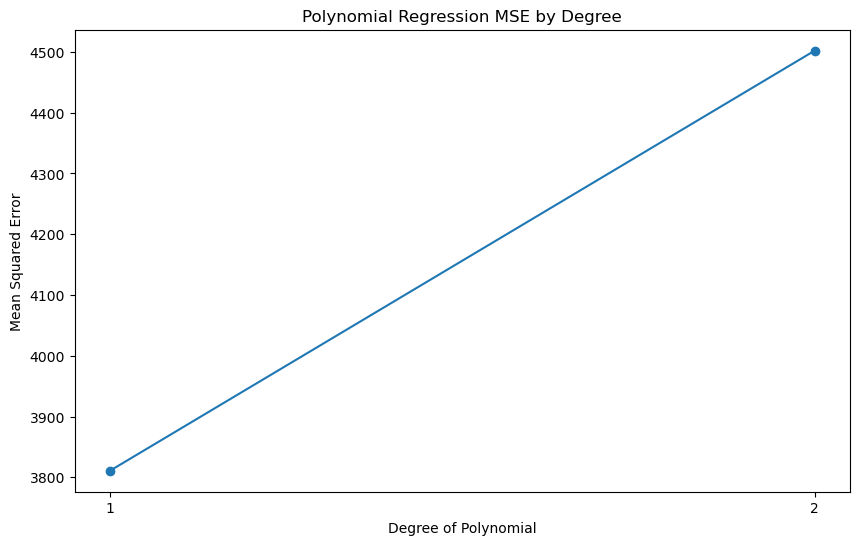

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Assuming `train_data` is your DataFrame and is already defined.
# Define the features (X) and the target (y)
X = train_data.drop(columns=['sales'])
y = train_data['sales']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting the maximum degree of polynomial
max_degree = 2

# Dictionary to store MSE for each degree
mse_dict = {}

# Loop over degrees of the polynomial
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on the validation set
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate MSE and store it in the dictionary
    mse = mean_squared_error(y_val, y_val_pred)
    mse_dict[degree] = mse

degrees = []
mse_values = []
for degree, mse in mse_dict.items():
    print(f"MSE for degree {degree}: {mse}")
    degrees.append(degree)
    mse_values.append(mse)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o')
plt.title('Polynomial Regression MSE by Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.show()


# LASSO regression

C:\Users\65924\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


Best alpha: 2.6826826826826826
Best MSE from CV: 1396.6701011573848
MSE from CV: 4651.23607989944


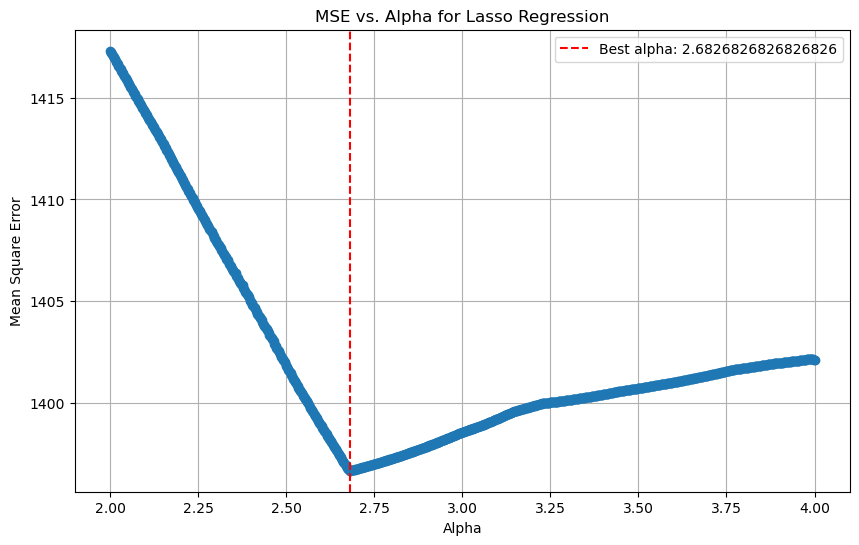

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming `train_data` is already defined and is a pandas DataFrame
X = train_data.drop(columns='sales')
y = train_data['sales']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)


# Adjust the number of alphas as needed, more alphas mean a finer search, but takes longer.
lasso_cv = LassoCV(alphas=np.linspace(2, 4, 1000), cv=5, random_state=42)

# Fit the model on the scaled data
lasso_cv.fit(X_scaled, y)

y_train_pred = lasso_cv.predict(X)
# The best alpha and corresponding mean squared error from cross-validation
best_alpha = lasso_cv.alpha_
mse_path = lasso_cv.mse_path_
average_mse = mse_path.mean(axis=1)
best_mse_index = np.argmin(average_mse)
best_mse = average_mse[best_mse_index]

print(f'Best alpha: {best_alpha}')
print(f'Best MSE from CV: {best_mse}')
print(f'MSE from CV: {mse}')
# Plot the MSE vs. alpha values
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, average_mse, marker='o')
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best alpha: {best_alpha}')
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')
plt.title('MSE vs. Alpha for Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()


# Ridge regression

Best alpha: 135.3047774579806
Best MSE from CV: 1337.2599758119795


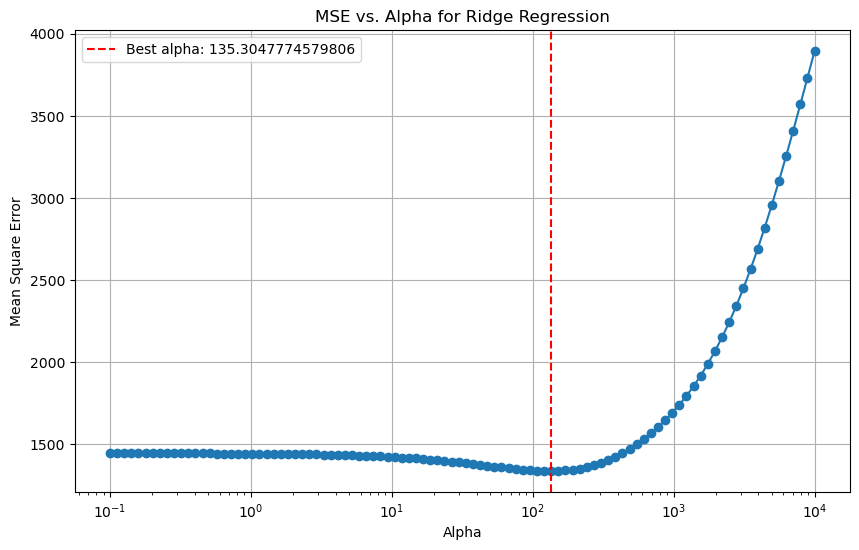

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a RidgeCV object. The alphas can be set to a log space to cover many orders of magnitude.
alphas = np.logspace(-1, 4, 100)  # Feel free to adjust the range as needed.

# Fit the RidgeCV model on the training data
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_scaled, y)

# The best alpha and corresponding mean squared error from cross-validation
best_alpha = ridge_cv.alpha_
cv_mse = ridge_cv.cv_values_.mean(axis=0)

print(f'Best alpha: {best_alpha}')
print(f'Best MSE from CV: {min(cv_mse)}')

# Plot the MSE vs. alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_mse, marker='o')
plt.xscale('log')  # Since alphas cover several orders of magnitude, a log scale can be helpful.
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best alpha: {best_alpha}')
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')
plt.title('MSE vs. Alpha for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


# E net

Best alpha: 0.298364724028334
Best l1_ratio: 0.7
Best MSE from CV: 1326.2988464026782


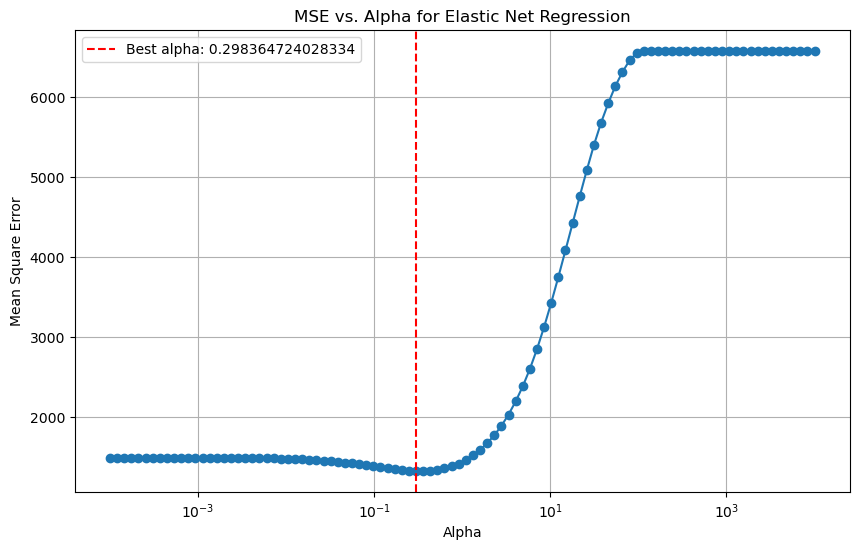

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


elastic_net_cv = ElasticNetCV(l1_ratio= 0.7, 
                              alphas=np.logspace(-4, 4, 100), 
                              cv=5, 
                              random_state=42,    
                              max_iter=1000)


# Fit the model on the scaled data
elastic_net_cv.fit(X_scaled, y)

# The best alpha, l1_ratio and corresponding mean squared error from cross-validation
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

# Here, we're interested in the average MSE for the best l1_ratio across all alphas
mse_path_for_best_l1_ratio = elastic_net_cv.mse_path_[elastic_net_cv.l1_ratio_ == best_l1_ratio]
average_mse = np.mean(mse_path_for_best_l1_ratio, axis=-1).ravel()  # Averaging over folds
best_mse_index = np.argmin(average_mse)
best_mse = average_mse[best_mse_index]

print(f'Best alpha: {best_alpha}')
print(f'Best l1_ratio: {best_l1_ratio}')
print(f'Best MSE from CV: {best_mse}')

# Plot the MSE vs. alpha values for the best l1_ratio
plt.figure(figsize=(10, 6))
plt.semilogx(elastic_net_cv.alphas_, average_mse, marker='o')
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best alpha: {best_alpha}')
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')
plt.title('MSE vs. Alpha for Elastic Net Regression')
plt.legend()
plt.grid(True)
plt.show()

l1_ratio: 0.1
Best alpha: 0.1176811952434999
Best MSE: 1334.4644493162828

l1_ratio: 0.5
Best alpha: 0.20565123083486536
Best MSE: 1330.499384925677

l1_ratio: 0.7
Best alpha: 0.298364724028334
Best MSE: 1326.2988464026782

l1_ratio: 0.9
Best alpha: 0.9111627561154896
Best MSE: 1319.6417145571438

l1_ratio: 0.95
Best alpha: 1.3219411484660315
Best MSE: 1323.6927643555046

l1_ratio: 0.99
Best alpha: 3.351602650938848
Best MSE: 1377.1735988194557

l1_ratio: 1
Best alpha: 2.782559402207126
Best MSE: 1397.2755537281337



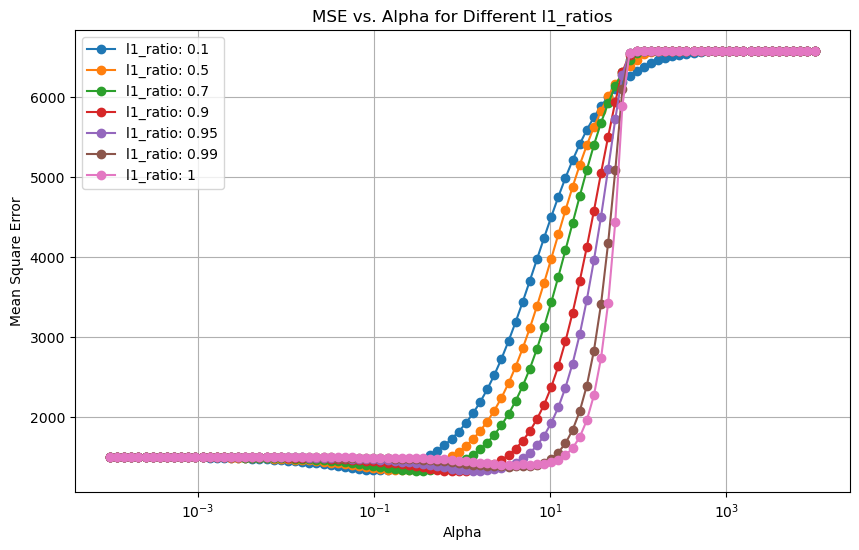

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')
# List of l1_ratios to evaluate
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

plt.figure(figsize=(10, 6))

# Loop over l1_ratios
for l1_ratio in l1_ratios:
    elastic_net_cv = ElasticNetCV(l1_ratio=l1_ratio,
                                  alphas=np.logspace(-4, 4, 100), 
                                  cv=5, 
                                  random_state=42,    
                                  max_iter=1000)

    # Fit the model on the scaled data
    elastic_net_cv.fit(X_scaled, y)
    # Get the best alpha and corresponding MSE for this l1_ratio
    best_alpha = elastic_net_cv.alpha_
    mse_path_for_best_alpha = elastic_net_cv.mse_path_[np.where(elastic_net_cv.alphas_ == best_alpha)]
    best_mse = np.mean(mse_path_for_best_alpha, axis=-1).ravel()  # Averaging over folds

    print(f'l1_ratio: {l1_ratio}')
    print(f'Best alpha: {best_alpha}')
    print(f'Best MSE: {best_mse[0]}\n')
    # Extract the average MSE for each alpha and l1_ratio
    mse_path_for_l1_ratio = np.mean(elastic_net_cv.mse_path_, axis=-1).ravel()

    # Plot the MSE vs. alpha values for the current l1_ratio
    plt.semilogx(elastic_net_cv.alphas_, mse_path_for_l1_ratio, marker='o', label=f'l1_ratio: {l1_ratio}')

# Aesthetics for the plot
plt.xlabel('Alpha')
plt.ylabel('Mean Square Error')
plt.title('MSE vs. Alpha for Different l1_ratios')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import numpy as np
from sklearn.linear_model import ElasticNetCV
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# List of l1_ratios to evaluate
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

for l1_ratio in l1_ratios:
    # Define the model with the current l1_ratio
    elastic_net_cv = ElasticNetCV(l1_ratio=l1_ratio,
                                  alphas=np.logspace(-4, 4, 100),
                                  cv=5,
                                  random_state=42,
                                  max_iter=1000)
    # Fit the model on the scaled data
    elastic_net_cv.fit(X_scaled, y)

    # Get the best alpha and its corresponding MSE
    best_alpha = elastic_net_cv.alpha_
    best_l1_ratio = elastic_net_cv.l1_ratio_
    best_mse = min(np.mean(elastic_net_cv.mse_path_, axis=1))  # Best MSE across all alphas for this l1_ratio

    print(f'For l1_ratio = {l1_ratio}')
    print(f'Best alpha: {best_alpha}')
    print(f'Best MSE: {best_mse}\n')


For l1_ratio = 0.1
Best alpha: 0.1176811952434999
Best MSE: 1334.4644493162828

For l1_ratio = 0.5
Best alpha: 0.20565123083486536
Best MSE: 1330.499384925677

For l1_ratio = 0.7
Best alpha: 0.298364724028334
Best MSE: 1326.2988464026782

For l1_ratio = 0.9
Best alpha: 0.9111627561154896
Best MSE: 1319.6417145571438

For l1_ratio = 0.95
Best alpha: 1.3219411484660315
Best MSE: 1323.6927643555046

For l1_ratio = 0.99
Best alpha: 3.351602650938848
Best MSE: 1377.1735988194557

For l1_ratio = 1
Best alpha: 2.782559402207126
Best MSE: 1397.2755537281337



# Decision tree

In [6]:
train_data["log-sales"]=np.log(train_data.sales)
y_train=train_data["log-sales"]
X_train=train_data.drop('log-sales',axis=1)

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,train_size=0.8, random_state=132)

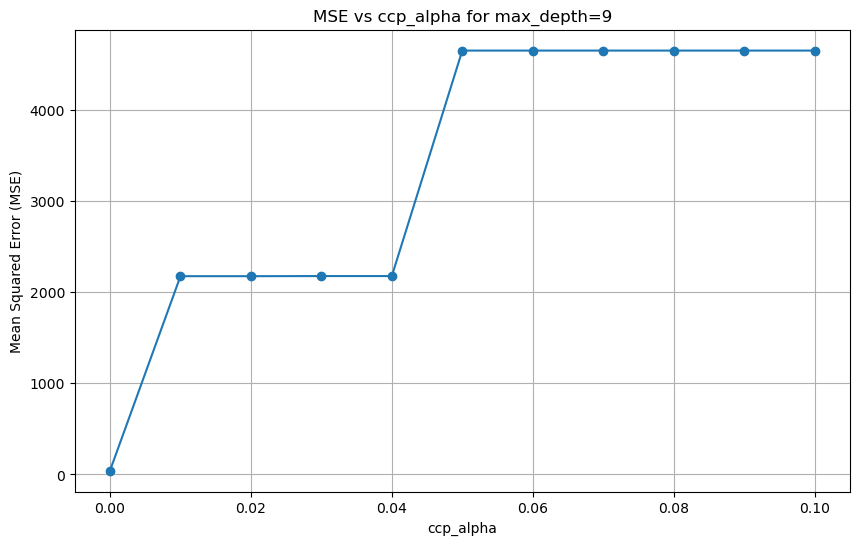

(9, 0.0, 41.061578493392204)

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Exploring different values of max_depth and ccp_alpha
max_depth_options = range(1, 11)  # Exploring depths from 1 to 10
ccp_alpha_options = np.linspace(0, 0.1, 11)  # Exploring ccp_alpha from 0 to 0.1


best_mse = float('inf')
best_max_depth = None
best_ccp_alpha = None
mse_values = []

# Original sales data before log-scaling
original_y_test = np.expm1(y_test)



for max_depth in max_depth_options:
    for ccp_alpha in ccp_alpha_options:
        # Creating and fitting the decision tree regressor
        tree = DecisionTreeRegressor(max_depth=max_depth, ccp_alpha=ccp_alpha, random_state=42)
        tree.fit(X_train, y_train)

        # Predicting and reversing the log scale
        y_pred = np.expm1(tree.predict(X_test))
        mse = mean_squared_error(original_y_test, y_pred)

        # Keeping track of MSE values for the graph
        mse_values.append((ccp_alpha, max_depth, mse))

        # Updating the best parameters if the current MSE is lower
        if mse < best_mse:
            best_mse = mse
            best_max_depth = max_depth
            best_ccp_alpha = ccp_alpha

# Training the best model
best_tree = DecisionTreeRegressor(max_depth=best_max_depth, ccp_alpha=best_ccp_alpha, random_state=42)
best_tree.fit(X_train, y_train)

# Plotting the tree
#plt.figure(figsize=(20, 10))
#plot_tree(best_tree, filled=True)
#plt.title("Regression Tree with max_depth={} and ccp_alpha={}".format(best_max_depth, best_ccp_alpha))
#plt.show()

# Preparing data for MSE vs ccp_alpha graph
mse_values = np.array(mse_values)
mse_values = mse_values[mse_values[:, 1] == best_max_depth]  # Filtering for the best max_depth

# Plotting MSE vs ccp_alpha for the best max_depth
plt.figure(figsize=(10, 6))
plt.plot(mse_values[:, 0], mse_values[:, 2], marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs ccp_alpha for max_depth={}".format(best_max_depth))
plt.grid(True)
plt.show()

best_max_depth, best_ccp_alpha, best_mse

In [24]:
from sklearn.model_selection import KFold

# Settings for K-Fold
n_splits = 5  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

best_mse = float('inf')
best_max_depth = None
best_ccp_alpha = None
mse_values = []

for max_depth in max_depth_options:
    for ccp_alpha in ccp_alpha_options:
        mse_fold = []

        for train_index, test_index in kf.split(X_train):
            # Splitting the data into folds
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            # Creating and fitting the decision tree regressor
            tree = DecisionTreeRegressor(max_depth=max_depth, ccp_alpha=ccp_alpha, random_state=42)
            tree.fit(X_train_fold, y_train_fold)

            # Predicting and reversing the log scale
            y_pred_fold = np.expm1(tree.predict(X_test_fold))
            mse_fold.append(mean_squared_error(np.expm1(y_test_fold), y_pred_fold))

        # Average MSE across folds
        avg_mse = np.mean(mse_fold)
        mse_values.append((ccp_alpha, max_depth, avg_mse))

        # Updating the best parameters if the current average MSE is lower
        if avg_mse < best_mse:
            best_mse = avg_mse
            best_max_depth = max_depth
            best_ccp_alpha = ccp_alpha

# Training the best model
best_tree = DecisionTreeRegressor(max_depth=best_max_depth, ccp_alpha=best_ccp_alpha, random_state=42)
best_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, random_state=42)

In [21]:
best_max_depth, best_ccp_alpha, best_mse

(8, 0.0, 223.55461318099088)

In [27]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Settings for K-Fold
n_splits = 5  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

best_mse = float('inf')
best_max_depth = None
best_ccp_alpha = None
best_n_components = None
mse_values = []

# Define a range for the number of PCA components
pca_components_options = range(1, 11)  # for example, from 1 to 10

for n_components in pca_components_options:
    pca = PCA(n_components=n_components)

    for max_depth in max_depth_options:
        for ccp_alpha in ccp_alpha_options:
            mse_fold = []

            for train_index, test_index in kf.split(X_train):
                # Splitting the data into folds
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                # Apply PCA
                X_train_pca = pca.fit_transform(X_train_fold)
                X_test_pca = pca.transform(X_test_fold)

                # Creating and fitting the decision tree regressor
                tree = DecisionTreeRegressor(max_depth=max_depth, ccp_alpha=ccp_alpha, random_state=42)
                tree.fit(X_train_pca, y_train_fold)

                # Predicting and reversing the log scale
                y_pred_fold = np.expm1(tree.predict(X_test_pca))
                mse_fold.append(mean_squared_error(np.expm1(y_test_fold), y_pred_fold))

            # Average MSE across folds
            avg_mse = np.mean(mse_fold)
            mse_values.append((n_components, ccp_alpha, max_depth, avg_mse))

            # Updating the best parameters if the current average MSE is lower
            if avg_mse < best_mse:
                best_mse = avg_mse
                best_max_depth = max_depth
                best_ccp_alpha = ccp_alpha
                best_n_components = n_components

# Training the best model
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)
best_tree = DecisionTreeRegressor(max_depth=best_max_depth, ccp_alpha=best_ccp_alpha, random_state=42)
best_tree.fit(X_train_pca, y_train)


DecisionTreeRegressor(max_depth=8, random_state=42)

In [37]:
best_n_components
best_max_depth
best_ccp_alpha
best_mse

439.23462530501354